# Meru Prastarah 4

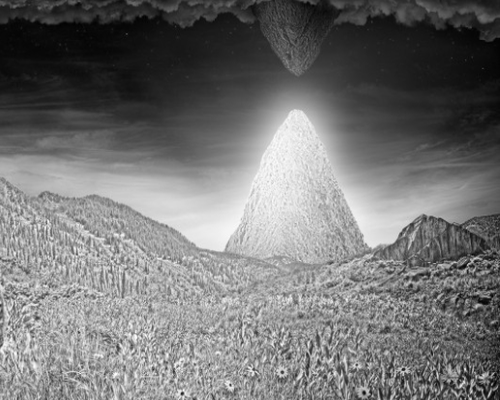

In [2]:
import kilroy
kilroy.Show('meru', 'meru_reflected.png',500,400)

### Friendly introduction

This is the last notebook in a sequence of four on Meru Prastarah. Here we give one possible approach to completing
the table by reflecting the original mountain up and to the left 'into the sky'. 

### Terms

### One way to go

On the previous notebook **3 B Meru Prastarah** we set up a question like this:


- Here is Meru Prastarah
- Here are the sums of the rows
- Here are the magenta sums (tilted rows): Fibonacci sequence
- Fibonacci goes forward forever
- Fibonacci can go backwards forever also
- We can write backwards-Fibonacci up into the sky above Meru Prastarah
- If Meru Prastarah gave us Fibonacci: Can backwards-Fibonacci give us backwards Meru Prastarah? 

This is: How could you use the continuation of Fibonacci upwards to also continue Meru Prastarah upwards?' 


Before reading on here please write down any ideas you came up with.


One idea is to say 'the same magenta lines must continue to work'. We then draw magenta lines down and to the left
from the backwards-Fibonacci numbers and try to fill in the empty cells so that we get the correct sums.
That is: The original magenta sum-lines went *from* Meru Prastarah *to* the Fibonacci sequence. Now we 
enter the looking glass world and go *from* Fibonacci *to* Meru Prastarah. Really backwards-Fibonacci
to backwards-Meru Prastarah. 


<br>${\Huge \infty}$


Why will we call these backwards parts of the diagram **iccanobif** and **haratsarpurem**?


**Solution** To be sure going backwards is not obvious. After some experimenting I came up with the idea 
of extending the line of ones along the right edge of Meru Prastarah upwards and to the left, bordering 
iccanobif. This makes it so that the rest of haratsarpurem will fill in 
pretty much automatically. 

Next I noticed that the zeroth Fibonacci number which is also the zeroth iccanobif number happens to be 
zero; and this means that it's sum-line is zero. In the figure below this sum-line is drawn in black.
It is zero if it lands on a cell with a zero in it; so I put a zero there. Then I put zeros across
that row going to the left. That is: The summit of Meru Prastarah is row 0 and cell 0 is the only non-zero
cell (which has value 1). The remaining cells -- it seems reasonable to say -- are all zero. This
works for iccanobif number 1 which is 1. Notice that in the figure below its sum line is drawn in green
and it touches just one cell with value 1; so the sum works out. 

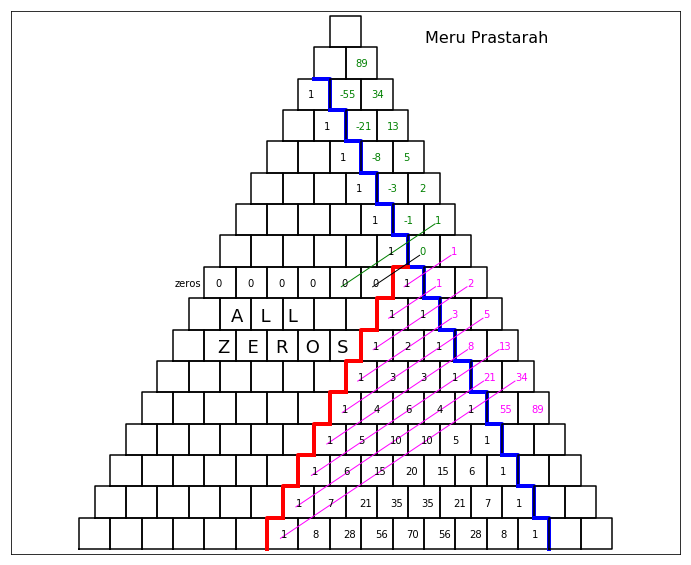

In [4]:
def fibonacci(n):
    f0, f1 = 0, 1
    for i in range(n):
        tmp = f1
        f1 += f0
        f0 = tmp
    return f0

def iccanobif(n):
    f0, f1 = 0, 1
    for i in range(n):
        tmp = f0
        f0 = f1 - f0
        f1 = tmp
    return f1

import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import comb
%matplotlib inline
pascal_size = 17
(xmp0, ymp0) = (0.61, 0.492)
(xmpDx0, xmpDx1, ympDy) = (0.029, 0.059, 0.059)
# return coordinates based on a = cell (x) and b = row (y)
def xmp(a,b): return xmp0 - float(b)*xmpDx0 + float(a)*xmpDx1
def ymp(a,b): return ymp0 - float(b)*ympDy
fig, ax = plt.subplots(figsize=(12,10))
ax.axis('equal')
ax.set(xlim=(-0.01, 1.01), ylim=(-0.01,1.01))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
(dx, dy) = (1.0/pascal_size, 1.0/pascal_size)

# create the cells
for row in range(int(pascal_size)):
    this_row = row + 1
    for column in range(this_row):
        x = 0.5 - float(this_row)*0.5*dx + float(column)*dx
        y = 1.0 - dy*float(this_row)
        ax.plot([x, x+dx, x+dx, x, x], [y, y, y+dy, y+dy, y], color='k')
        if this_row >= 3 and column == this_row - 3: ax.plot([x+dx/2., x+dx, x+dx], [y + dy, y + dy, y], color='b', linewidth=4)
        if this_row >= 9 and column == 6: ax.plot([x,x,x+dx/2],[y,y+dy,y+dy], color='r', linewidth=4)

# write in the numbers of the first 9 rows        
for j in range(0, 9):
    for i in range(0,j+1):
        plt.text(xmp(i,j), ymp(i,j), int(comb(j,i)))

# draw in the magenta sum-lines
for j in range(9):
    (x0, y0) = (xmp(0,j), ymp(0,j))
    (iMap, jMap) = (j/2+1, (j+1)/2-1)
    (x1, y1) = (xmp(iMap, jMap), ymp(iMap, jMap))
    ax.plot([x0, x1], [y0, y1], color='magenta', linewidth=1)
    
# write in the fibonacci numbers           
for j in range(0, 11):
    col = 1 + int((j)/2)-((j)%2)/2
    row = int((j+1)/2) - 1
    plt.text(xmp(col,row), ymp(col,row), fibonacci(j+1), color='magenta')

# write in the iccanobif numbers
for j in range(-1, 11):
    col = int(-j/2)-(-j%2)/2
    row = int((-j-1)/2) - 1
    plt.text(xmp(col,row), ymp(col,row), iccanobif(j+2), color='g')

plt.text(0.18, 0.492, 'zeros')
plt.text(0.286, 0.425, 'A   L   L', fontsize='18')
plt.text(0.26, 0.368, 'Z   E   R   O   S', fontsize='18')
for j in range(-6, 0):
    plt.text(xmp(j, 0), ymp(j, 0), 0)
    plt.text(xmp(j, j), ymp(j,j), 1)
    
(x0, y0) = (xmp(0, -1), ymp(0, -1))
(x1, y1) = (xmp(-1, 0), ymp(-1, 0))
ax.plot([x0, x1], [y0, y1], color='k', linewidth=1)
(x0, y0) = (xmp(0, -2), ymp(0, -2))
(x1, y1) = (xmp(-2, 0), ymp(-2, 0))
ax.plot([x0, x1], [y0, y1], color='green', linewidth=1)

    
plt.text(0.65, 0.95, "Meru Prastarah", fontsize='16')
plt.show()

Let's use the same location system for cells in haratsarpurem that we used for Meru Prastarah. 
That is: First rows, and then cells within rows, starting at $\binom{0}{0}$. So far we have
filled in just the first entry of each row, setting it equal to $1$. We also put in some
'buffer' zeros along the other edge of haratsarpurem. 


Now the rest of haratsarpurem follows. iccanobif-2 is $-1$ and its sum-line
touches only one cell of haratsarpurem, which is cell $\binom{1}{1}$. Therefore it is given
the value $-1$. Here is our first difference from Meru Prastarah where the cell value was $1$. 


Iccanobif-3 is $2$ which must be the line sum across two cells: $2 = \binom{1}{0} + \binom{2}{2}$.
Since $\binom{1}{0}=1$ we must have $\binom{2}{2}=1$ also so that they sum to $2$. 


Now we have a new pattern along the second edge of haratsarpurem, the edge where the addresses are
$\binom{0}{0}, \;\binom{1}{1}, \;\binom{2}{2}, \;\binom{3}{3}, \;\binom{4}{4}, \;\dots$. That
is, from the first three values it appears to be alternating $+1$ and $-1$. Let's take that
to be the pattern and fill in the numbers in this way. 

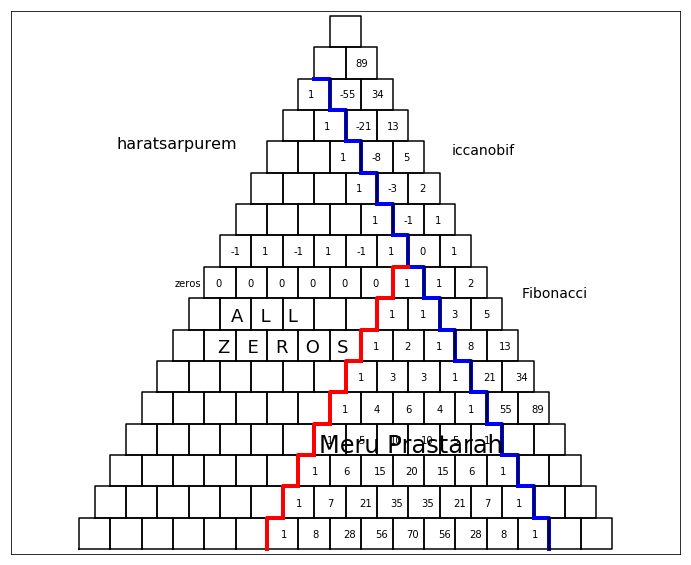

In [5]:
def fibonacci(n):
    f0, f1 = 0, 1
    for i in range(n):
        tmp = f1
        f1 += f0
        f0 = tmp
    return f0

def iccanobif(n):
    f0, f1 = 0, 1
    for i in range(n):
        tmp = f0
        f0 = f1 - f0
        f1 = tmp
    return f1

import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import comb
%matplotlib inline
pascal_size = 17
(xmp0, ymp0) = (0.61, 0.492)
(xmpDx0, xmpDx1, ympDy) = (0.029, 0.059, 0.059)
# return coordinates based on a = cell (x) and b = row (y)
def xmp(a,b): return xmp0 - float(b)*xmpDx0 + float(a)*xmpDx1
def ymp(a,b): return ymp0 - float(b)*ympDy
fig, ax = plt.subplots(figsize=(12,10))
ax.axis('equal')
ax.set(xlim=(-0.01, 1.01), ylim=(-0.01,1.01))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
(dx, dy) = (1.0/pascal_size, 1.0/pascal_size)

# create the cells
for row in range(int(pascal_size)):
    this_row = row + 1
    for column in range(this_row):
        x = 0.5 - float(this_row)*0.5*dx + float(column)*dx
        y = 1.0 - dy*float(this_row)
        ax.plot([x, x+dx, x+dx, x, x], [y, y, y+dy, y+dy, y], color='k')
        if this_row >= 3 and column == this_row - 3: ax.plot([x+dx/2., x+dx, x+dx], [y + dy, y + dy, y], color='b', linewidth=4)
        if this_row >= 9 and column == 6: ax.plot([x,x,x+dx/2],[y,y+dy,y+dy], color='r', linewidth=4)

# write in the numbers of the first 9 rows        
for j in range(0, 9):
    for i in range(0,j+1):
        plt.text(xmp(i,j), ymp(i,j), int(comb(j,i)))
    
# write in the fibonacci numbers           
for j in range(0, 11):
    col = 1 + int((j)/2)-((j)%2)/2
    row = int((j+1)/2) - 1
    plt.text(xmp(col,row), ymp(col,row), fibonacci(j+1))

# write in the iccanobif numbers
for j in range(-1, 11):
    col = int(-j/2)-(-j%2)/2
    row = int((-j-1)/2) - 1
    plt.text(xmp(col,row), ymp(col,row), iccanobif(j+2))

plt.text(0.18, 0.492, 'zeros')
plt.text(0.286, 0.425, 'A   L   L', fontsize='18')
plt.text(0.26, 0.368, 'Z   E   R   O   S', fontsize='18')
for j in range(-6, 0):
    plt.text(xmp(j, 0), ymp(j, 0), 0)
    plt.text(xmp(j, j), ymp(j,j), 1)

alt_1 = -1
for j in range(-6, -1):
    plt.text(xmp(j, -1), ymp(j, -1), alt_1)
    alt_1 = -alt_1
    
    
plt.text(0.45, 0.18, "Meru Prastarah", fontsize='24')
plt.text(0.07, 0.75, "haratsarpurem", fontsize='16')
plt.text(0.83, 0.47, "Fibonacci", fontsize='14')
plt.text(0.70, 0.74, "iccanobif", fontsize='14')
plt.show()

### Finishing haratsarpurem


Now the interior of the haratsarpurem pattern follows. $\binom{2}{2}$ must be $-2$ and so on. In fact
haratsarpurem can be seen as Meru Prastarah with half of the numbers now negative instead of positive. 


A negative number can be seen as a positive number reflected through zero. Therefore we can conclude 
that haratsarpurem is a version of Meru Prastarah that is half-reflected... so the metaphor of the
looking glass worked out for us.


<br>${\Huge \infty}$

What is the sum of rows in haratsarpurem? 

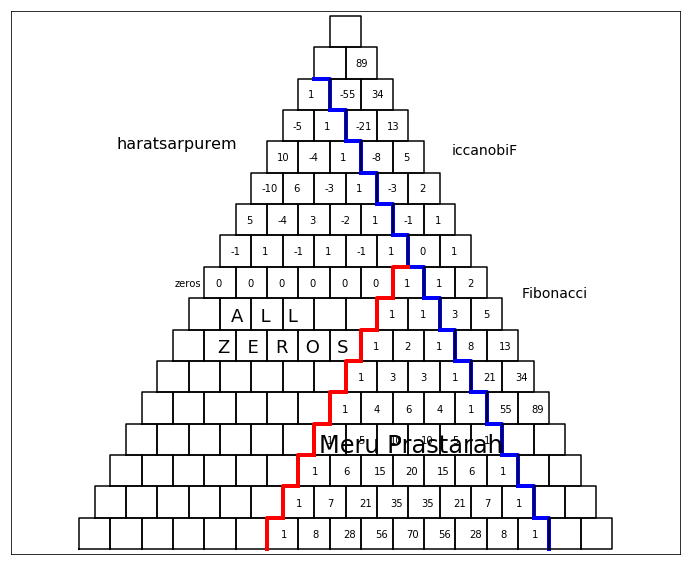

In [3]:
def fibonacci(n):
    f0, f1 = 0, 1
    for i in range(n):
        tmp = f1
        f1 += f0
        f0 = tmp
    return f0

def iccanobif(n):
    f0, f1 = 0, 1
    for i in range(n):
        tmp = f0
        f0 = f1 - f0
        f1 = tmp
    return f1

import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import comb
%matplotlib inline
pascal_size = 17
(xmp0, ymp0) = (0.61, 0.492)
(xmpDx0, xmpDx1, ympDy) = (0.029, 0.059, 0.059)
# return coordinates based on a = cell (x) and b = row (y)
def xmp(a,b): return xmp0 - float(b)*xmpDx0 + float(a)*xmpDx1
def ymp(a,b): return ymp0 - float(b)*ympDy
fig, ax = plt.subplots(figsize=(12,10))
ax.axis('equal')
ax.set(xlim=(-0.01, 1.01), ylim=(-0.01,1.01))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
(dx, dy) = (1.0/pascal_size, 1.0/pascal_size)

# create the cells
for row in range(int(pascal_size)):
    this_row = row + 1
    for column in range(this_row):
        x = 0.5 - float(this_row)*0.5*dx + float(column)*dx
        y = 1.0 - dy*float(this_row)
        ax.plot([x, x+dx, x+dx, x, x], [y, y, y+dy, y+dy, y], color='k')
        if this_row >= 3 and column == this_row - 3: ax.plot([x+dx/2., x+dx, x+dx], [y + dy, y + dy, y], color='b', linewidth=4)
        if this_row >= 9 and column == 6: ax.plot([x,x,x+dx/2],[y,y+dy,y+dy], color='r', linewidth=4)

# write in the numbers of the first 9 rows        
for j in range(0, 9):
    for i in range(0,j+1):
        plt.text(xmp(i,j), ymp(i,j), int(comb(j,i)))
    
# write in the fibonacci numbers           
for j in range(0, 11):
    col = 1 + int((j)/2)-((j)%2)/2
    row = int((j+1)/2) - 1
    plt.text(xmp(col,row), ymp(col,row), fibonacci(j+1))

# write in the iccanobif numbers
for j in range(-1, 11):
    col = int(-j/2)-(-j%2)/2
    row = int((-j-1)/2) - 1
    plt.text(xmp(col,row), ymp(col,row), iccanobif(j+2))

plt.text(0.18, 0.492, 'zeros')
plt.text(0.286, 0.425, 'A   L   L', fontsize='18')
plt.text(0.26, 0.368, 'Z   E   R   O   S', fontsize='18')
for j in range(-6, 0):
    plt.text(xmp(j, 0), ymp(j, 0), 0)
    plt.text(xmp(j, j), ymp(j,j), 1)

alt_1 = -1
for j in range(-6, -1):
    plt.text(xmp(j, -1), ymp(j, -1), alt_1)
    alt_1 = -alt_1

for i in range(-5, -1):
    for j in range(-6, i):
        the_sign = 1 - 2*((i+j)%2)
        plt.text(xmp(j, i), ymp(j, i), the_sign*int(comb(-j-1,-i-1)))

    
plt.text(0.45, 0.18, "Meru Prastarah", fontsize='24')
plt.text(0.07, 0.75, "haratsarpurem", fontsize='16')
plt.text(0.83, 0.47, "Fibonacci", fontsize='14')
plt.text(0.70, 0.74, "iccanobiF", fontsize='14')
plt.show()

### And then...


This is the end of an initial look at the Pascal Triangle, Meru Prastarah, ... and by any other names the
mathematical structure of numbers that describe the counting of subsets. 


If you wish to explore this further just say the word. There are many more hikes to follow. And you may
certainly look into the sequence of notebooks concerned with Fibonacci.